In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exploratory Data Analysis

In [51]:
accidents_data = pd.read_csv("D:\Python/data/US_Accidents_Dec21_updated.csv")
accidents_data.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


Look at null values

In [52]:
accidents_data.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

Now let's look at the number of unique values for each feature and label class

In [53]:
description = accidents_data.describe(include='all')
description

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,2845342,2.845342e+06,2845342,2845342,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2845342,...,2845342,2845342,2845342,2845342,2845342,2845342,2842475,2842475,2842475,2842475
unique,2845342,NaN,1959333,2351505,NaN,NaN,NaN,NaN,NaN,1174563,...,2,2,2,2,2,1,2,2,2,2
top,A-1,NaN,2021-01-26 16:16:13,2021-11-22 08:00:00,NaN,NaN,NaN,NaN,NaN,A crash has occurred causing no to minimum del...,...,False,False,False,False,False,False,Day,Day,Day,Day
freq,1,NaN,214,88,NaN,NaN,NaN,NaN,NaN,7978,...,2845219,2777347,2794942,2843630,2580079,2845342,1811935,1929103,2063472,2176983
mean,NaN,2.137572e+00,NaN,NaN,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,4.787216e-01,NaN,NaN,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000e+00,NaN,NaN,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.000000e+00,NaN,NaN,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.000000e+00,NaN,NaN,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2.000000e+00,NaN,NaN,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
description.iloc[:, 6:]

,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,2.845342e+06,2.845342e+06,2.845342e+06,2845342,1.101431e+06,2845340,2845342,2845205,2845342,2845342,...,2845342,2845342,2845342,2845342,2845342,2845342,2842475,2842475,2842475,2842475
unique,NaN,NaN,NaN,1174563,NaN,159651,3,11681,1707,49,...,2,2,2,2,2,1,2,2,2,2
top,NaN,NaN,NaN,A crash has occurred causing no to minimum del...,NaN,I-95 N,R,Miami,Los Angeles,CA,...,False,False,False,False,False,False,Day,Day,Day,Day
freq,NaN,NaN,NaN,7978,NaN,39853,2353309,106966,234122,795868,...,2845219,2777347,2794942,2843630,2580079,2845342,1811935,1929103,2063472,2176983
mean,3.624532e+01,-9.711439e+01,7.026779e-01,NaN,8.089408e+03,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.363873e+00,1.831763e+01,1.560361e+00,NaN,1.836009e+04,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.456601e+01,-1.245457e+02,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.344628e+01,-1.180333e+02,5.200000e-02,NaN,1.270000e+03,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.609799e+01,-9.241772e+01,2.440000e-01,NaN,4.007000e+03,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.016105e+01,-8.037338e+01,7.640000e-01,NaN,9.567000e+03,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see, both 'Country' and 'Turning_Loop' features contain only one value, so they won't be helpful during training our model.

Look at the distribution of label class

1      26053
2    2532991
3     155105
4     131193
Name: Severity, dtype: int64


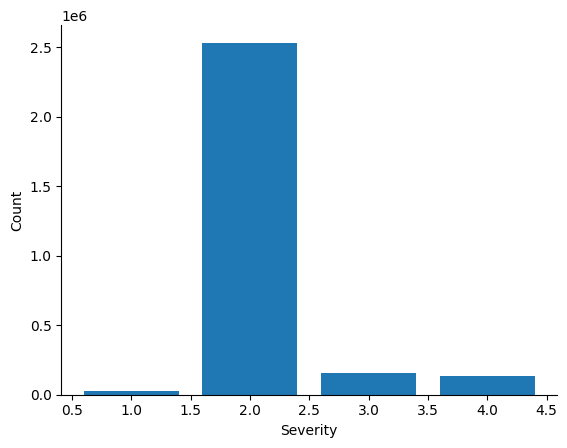

In [55]:
print(accidents_data['Severity'].value_counts().sort_index())

plt.figure()
plt.xlabel("Severity")
plt.ylabel("Count")
plt.bar(range(1,5),accidents_data['Severity'].value_counts().sort_index())
plt.gca().spines[['right', 'top']].set_visible(False);

As we can see, the distribution of severity class is highly imbalanced - most of the accidents are of severity 2.

Now, let's examine how weather conditions impact the frequency of accidents.

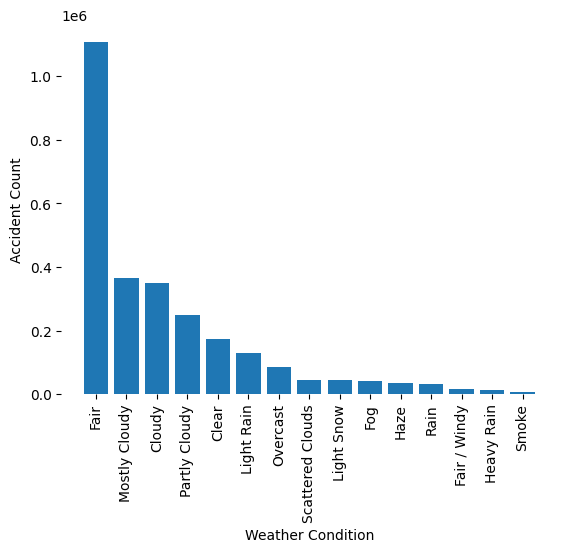

In [56]:
plt.figure()
plt.xlabel("Weather Condition")
plt.ylabel("Accident Count")
plt.bar(range(1,16), accidents_data['Weather_Condition'].value_counts().sort_values(ascending=False)[:15])
plt.xticks(range(1,16), accidents_data['Weather_Condition'].value_counts().sort_values(ascending=False)[:15].index, rotation=90)
plt.gca().set(frame_on=False);

This may give the impression that accidents are more probable in clear weather, but it could be due to the fact that clear weather occurs most frequently. Therefore, this may not be the most appropriate method to determine the probability of accidents based on weather conditions.

Let's now investigate how the day of the week influences the frequency of accidents. To do this, we first need to create a new feature: "Day_of_Week".

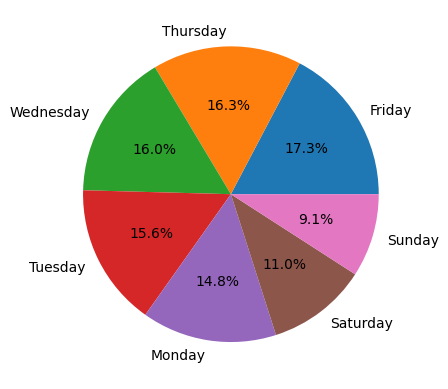

In [57]:
accidents_data['Start_Time'] = pd.to_datetime(accidents_data['Start_Time'], format='%Y-%m-%d %H:%M:%S')
accidents_data['End_Time'] = pd.to_datetime(accidents_data['End_Time'], format='%Y-%m-%d %H:%M:%S')
accidents_data['Day_of_Week'] = accidents_data['Start_Time'].dt.day_name()
accidents_data['Year']=accidents_data['Start_Time'].dt.year
accidents_data['Month']=accidents_data['Start_Time'].dt.month
accidents_data['Hour']=accidents_data['Start_Time'].dt.hour

plt.figure()
labels = accidents_data['Day_of_Week'].value_counts().index
plt.pie(accidents_data['Day_of_Week'].value_counts(), labels=labels, autopct='%1.1f%%', frame=False);

From the chart, it is evident that Sunday and Saturday have the lowest number of reported accidents since they are considered as rest days. On workdays, the number of accidents is roughly equal. However, Friday, which marks the start of the weekend, has the highest number of accidents recorded.

## Data Cleaning and Preprocessing, and Feature engineering

During the EDA, I included a new feature called "Day_of_Week". Next, I plan to add another features such as the 'Duration' of accidents (which will involve subtracting the start time from the end time), 'Year', 'Month' and 'Hour'.

In [58]:
accidents_data['Duration']=round((accidents_data['End_Time']-accidents_data['Start_Time'])/np.timedelta64(1,'m'))
accidents_data['Year']=accidents_data['Start_Time'].dt.year
accidents_data['Month']=accidents_data['Start_Time'].dt.month
accidents_data['Hour']=accidents_data['Start_Time'].dt.hour

As we saw during the EDA, both 'Country' and 'Turning_Loop' features contain only one value, so I will drop them. I will also eliminate 'Number' feature (it has a significant number of null values, thus it can introduce unnecessary noise to the models), 'Start_Time', 'End_Time' (used to create other features), 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng' (I will use 'Zipcode' instead), 'Description', 'Airport_Code', 'Weather_Timestamp', 'Timezone' (we have other features describing location and time) and 'ID' features. 

In [59]:
accidents_data.drop(columns=['Country', 'Turning_Loop', 'Number', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 
                             'End_Lat', 'End_Lng', 'Description', 'Airport_Code', 'Weather_Timestamp', 'Timezone', 'ID'], inplace=True)

It is important to drop duplicated rows

In [60]:
accidents_data.drop_duplicates()

,Severity,Distance(mi),Street,Side,City,County,State,Zipcode,Temperature(F),Wind_Chill(F),...,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Day_of_Week,Year,Month,Hour,Duration
0,3,3.230,Outerbelt E,R,Dublin,Franklin,OH,43017,42.1,36.1,...,False,Night,Night,Night,Night,Monday,2016,2,0,360.0
1,2,0.747,I-70 E,R,Dayton,Montgomery,OH,45424,36.9,NaN,...,False,Night,Night,Night,Night,Monday,2016,2,5,360.0
2,2,0.055,I-75 S,R,Cincinnati,Hamilton,OH,45203,36.0,NaN,...,False,Night,Night,Night,Day,Monday,2016,2,6,360.0
3,2,0.123,I-77 N,R,Akron,Summit,OH,44311,39.0,NaN,...,False,Night,Night,Day,Day,Monday,2016,2,6,360.0
4,3,0.500,I-75 S,R,Cincinnati,Hamilton,OH,45217,37.0,29.8,...,False,Day,Day,Day,Day,Monday,2016,2,7,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,0.543,Pomona Fwy E,R,Riverside,Riverside,CA,92501,86.0,86.0,...,False,Day,Day,Day,Day,Friday,2019,8,18,29.0
2845338,2,0.338,I-8 W,R,San Diego,San Diego,CA,92108,70.0,70.0,...,False,Day,Day,Day,Day,Friday,2019,8,19,27.0
2845339,2,0.561,Garden Grove Fwy,R,Orange,Orange,CA,92866,73.0,73.0,...,False,Day,Day,Day,Day,Friday,2019,8,19,28.0
2845340,2,0.772,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,71.0,71.0,...,False,Day,Day,Day,Day,Friday,2019,8,19,29.0


For features with a relatively small number of missing values, I will proceed with removing those missing values.

In [61]:
for feature in ['City', 'Street', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Zipcode']:
    accidents_data = accidents_data[accidents_data[feature].notna()]

accidents_data.shape

(2841184, 38)

In [62]:
accidents_data.isna().sum()

Severity                      0
Distance(mi)                  0
Street                        0
Side                          0
City                          0
County                        0
State                         0
Zipcode                       0
Temperature(F)            67399
Wind_Chill(F)            467720
Humidity(%)               71215
Pressure(in)              57329
Visibility(mi)            68628
Wind_Direction            71886
Wind_Speed(mph)          156046
Precipitation(in)        547526
Weather_Condition         68735
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station                       0
Stop                          0
Traffic_Calming               0
Traffic_Signal                0
Sunrise_Sunset                0
Civil_Twilight                0
Nautical

In [63]:
cols_dropna = [#'Timezone', 
                'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
               'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition']

accidents_data_dropna = accidents_data

for feature in cols_dropna:
    accidents_data_dropna = accidents_data_dropna[accidents_data_dropna[feature].notna()]

accidents_data_dropna.isna().sum()

Severity                      0
Distance(mi)                  0
Street                        0
Side                          0
City                          0
County                        0
State                         0
Zipcode                       0
Temperature(F)                0
Wind_Chill(F)                 0
Humidity(%)                   0
Pressure(in)                  0
Visibility(mi)                0
Wind_Direction                0
Wind_Speed(mph)               0
Precipitation(in)        148292
Weather_Condition             0
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station                       0
Stop                          0
Traffic_Calming               0
Traffic_Signal                0
Sunrise_Sunset                0
Civil_Twilight                0
Nautical

In [64]:
print(accidents_data.shape)
print(accidents_data_dropna.shape)

(2841184, 38)
(2355617, 38)


C:\Users\angel\AppData\Local\Temp\ipykernel_13392\3813184563.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(accidents_data.corr(), annot=True)


<AxesSubplot: >

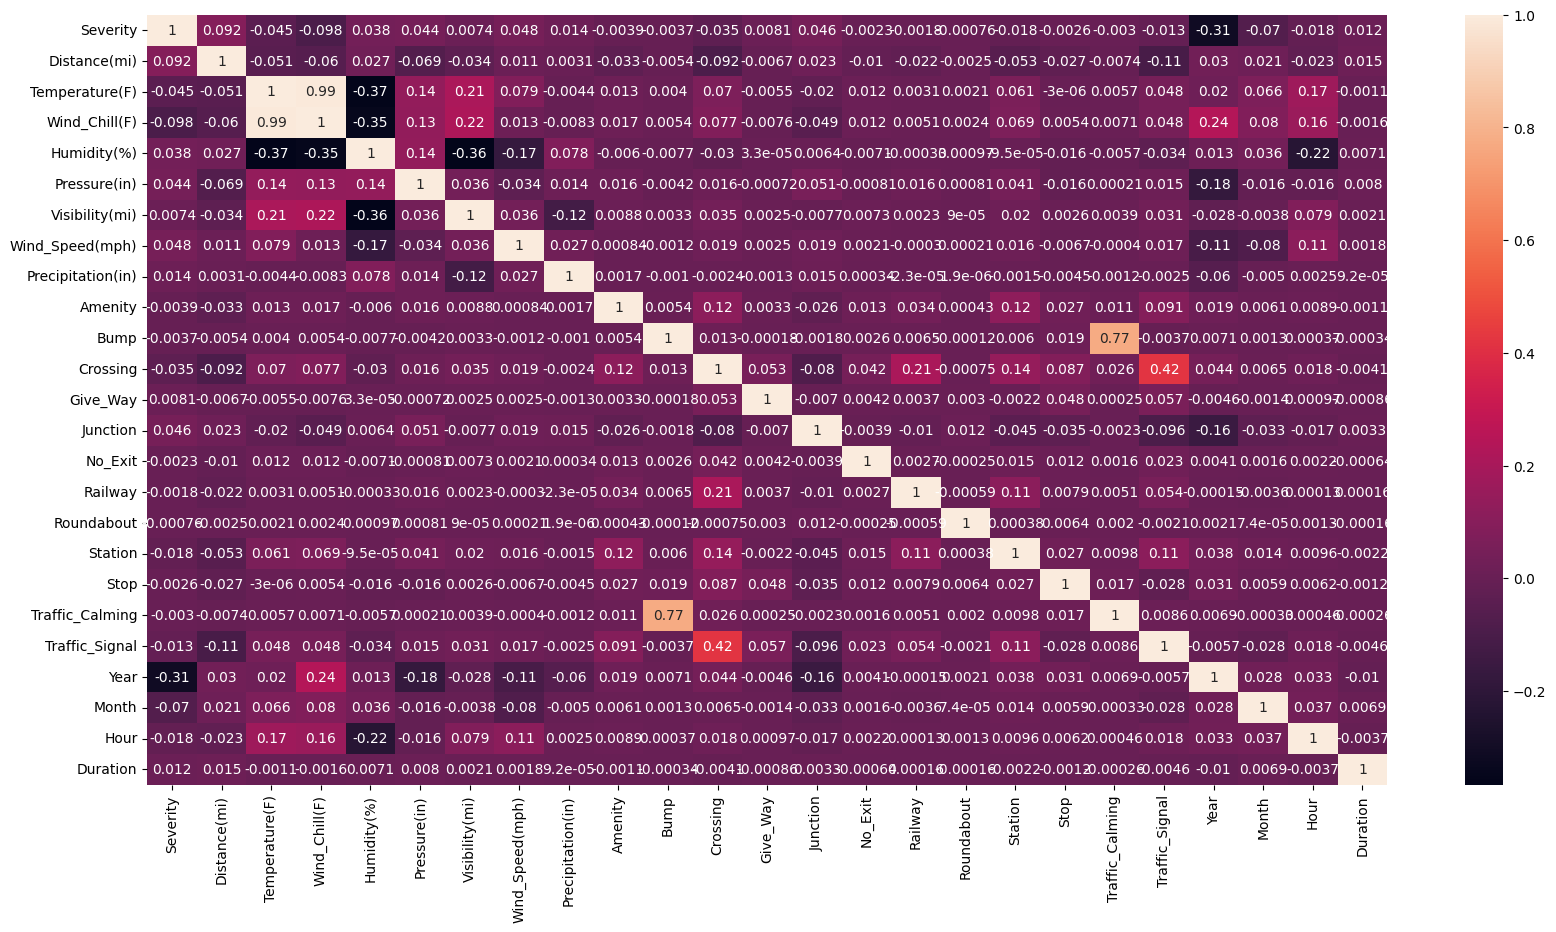

In [65]:
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(accidents_data.corr(), annot=True)

In [66]:
from sklearn.model_selection import train_test_split
X = accidents_data.drop(columns='Severity')
y = accidents_data['Severity']

categorical_cols = X.select_dtypes(include='object').columns
numerical_clos = X.select_dtypes(exclude='object').columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [67]:
from sklearn.model_selection import train_test_split
X_dropna = accidents_data_dropna.drop(columns='Severity')
y_dropna = accidents_data_dropna['Severity']

X_train_dropna, X_test_dropna, y_train_dropna, y_test_dropna = train_test_split(X_dropna, y_dropna, test_size=0.2, random_state=0)

In [68]:
print(accidents_data.info())
print(accidents_data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2841184 entries, 0 to 2845341
Data columns (total 38 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Distance(mi)           float64
 2   Street                 object 
 3   Side                   object 
 4   City                   object 
 5   County                 object 
 6   State                  object 
 7   Zipcode                object 
 8   Temperature(F)         float64
 9   Wind_Chill(F)          float64
 10  Humidity(%)            float64
 11  Pressure(in)           float64
 12  Visibility(mi)         float64
 13  Wind_Direction         object 
 14  Wind_Speed(mph)        float64
 15  Precipitation(in)      float64
 16  Weather_Condition      object 
 17  Amenity                bool   
 18  Bump                   bool   
 19  Crossing               bool   
 20  Give_Way               bool   
 21  Junction               bool   
 22  No_Exit           

In [69]:
X[categorical_cols].describe()

,Street,Side,City,County,State,Zipcode,Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Day_of_Week
count,2841184,2841184,2841184,2841184,2841184,2841184,2769298,2772449,2841184,2841184,2841184,2841184,2841184
unique,159127,2,11098,1688,49,361710,24,127,2,2,2,2,7
top,I-95 N,R,Miami,Los Angeles,CA,91761,CALM,Fair,Day,Day,Day,Day,Friday
freq,39851,2349916,106959,234120,795363,6162,433267,1106080,1811343,1928457,2062774,2176226,491454


In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Preprocessing for numerical data
numerical_transformer_median = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('median_imputer', SimpleImputer(strategy='median'))
    ])

numerical_transformer_zero = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('zero_imputer', SimpleImputer(strategy='constant', fill_value=0))
    ])


zero_cols = ['Precipitation(in)']

median_cols = [col for col in numerical_clos if col not in zero_cols]

# Preprocessing for categorical data
ordinal_categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ]) 

# ordinal_categorical_transformer_zero = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
#     ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
#   ]) 


onehot_categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]) 

OH_cols = ['Side', #'Timezone', 
           'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Day_of_Week']

ordinal_cols = [col for col in categorical_cols if col not in OH_cols]

#ordinal_cols_zero = [ ]

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num_median', numerical_transformer_median, median_cols),
        ('num_zero', numerical_transformer_zero, zero_cols),
        ('ord_cat', ordinal_categorical_transformer, ordinal_cols),
        #('ord_cat_zero', ordinal_categorical_transformer_zero, ordinal_cols_zero),
        #('binning', binning, cols_to_bin),
        #('binning_few', binning_few, cols_to_bin_few),
        ('onehot_cat', onehot_categorical_transformer, OH_cols)
    ])


## Model selection

1. Logistic Regression
2. Random Forest
3. AdaBoost
4. XGBoost

text

In [71]:
X_train_tree = X_train
X_train = preprocessor.fit_transform(X_train)

MemoryError: Unable to allocate 399. MiB for an array with shape (2272947, 23) and data type int64

In [ ]:
X_train_dropna_tree = X_train_dropna
X_train_dropna = preprocessor.fit_transform(X_train_dropna)

In [24]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

print('Value counts before under/over sampling:\n', y_train.value_counts().sort_index())

under_sampler = RandomUnderSampler(sampling_strategy={2.0:500000})
X_train_res, y_train_res = under_sampler.fit_resample(X_train, y_train)

over_sampler = SMOTE(sampling_strategy={1.0:50000})
X_train_res, y_train_res = over_sampler.fit_resample(np.array(X_train_res), y_train_res)

print('Value counts before under/over sampling:\n', y_train_res.value_counts().sort_index())

Value counts before under/over sampling:
 1      20819
2    2023636
3     123986
4     104506
Name: Severity, dtype: int64
Value counts before under/over sampling:
 1     50000
2    500000
3    123986
4    104506
Name: Severity, dtype: int64


In [25]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

print('Value counts before under/over sampling:\n', y_train_dropna.value_counts().sort_index())

under_sampler_dropna = RandomUnderSampler(sampling_strategy={2.0:500000})
X_train_dropna_res, y_train_dropna_res = under_sampler_dropna.fit_resample(X_train_dropna, y_train_dropna)

over_sampler_dropna = SMOTE(sampling_strategy={1.0:50000})
X_train_dropna_res, y_train_dropna_res = over_sampler_dropna.fit_resample(np.array(X_train_dropna_res), y_train_dropna_res)

print('Value counts before under/over sampling:\n', y_train_dropna_res.value_counts().sort_index())

Value counts before under/over sampling:
 1      20327
2    1738129
3      64620
4      61417
Name: Severity, dtype: int64
Value counts before under/over sampling:
 1     50000
2    500000
3     64620
4     61417
Name: Severity, dtype: int64


In [26]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

print('Value counts before under/over sampling:\n', y_train_dropna.value_counts().sort_index())

under_sampler_dropna_balanced = RandomUnderSampler(sampling_strategy={2.0:100000})
X_train_dropna_res_balanced, y_train_dropna_res_balanced = under_sampler_dropna_balanced.fit_resample(X_train_dropna, y_train_dropna)

over_sampler_dropna_balanced = SMOTE(sampling_strategy={1.0:100000, 3.0:100000, 4.0:100000})
X_train_dropna_res_balanced, y_train_dropna_res_balanced = over_sampler_dropna_balanced.fit_resample(np.array(X_train_dropna_res_balanced), y_train_dropna_res_balanced)

print('Value counts before under/over sampling:\n', y_train_dropna_res_balanced.value_counts().sort_index())

Value counts before under/over sampling:
 1      20327
2    1738129
3      64620
4      61417
Name: Severity, dtype: int64
Value counts before under/over sampling:
 1    100000
2    100000
3    100000
4    100000
Name: Severity, dtype: int64


In [ ]:
# For tree

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

print('Value counts before under/over sampling:\n', y_train_dropna.value_counts().sort_index())

under_sampler_dropna_balanced = RandomUnderSampler(sampling_strategy={2.0:100000})
X_train_tree_balanced, y_train_tree_balanced = under_sampler_dropna_balanced.fit_resample(X_train_d, y_train)

over_sampler_dropna_balanced = SMOTE(sampling_strategy={1.0:100000, 3.0:100000, 4.0:100000})
X_train_dropna_res_balanced, y_train_dropna_res_balanced = over_sampler_dropna_balanced.fit_resample(np.array(X_train_dropna_res_balanced), y_train_dropna_res_balanced)

print('Value counts before under/over sampling:\n', y_train_dropna_res_balanced.value_counts().sort_index())

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define model
lr_model = LogisticRegression(random_state=0, max_iter=1800)

scoring = ('accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted')

lr_scores = cross_validate(lr_model, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1)

In [27]:
lr_scores_df = pd.DataFrame(lr_scores)
lr_scores_df.mean()

fit_time                   1765.541747
score_time                    0.907560
test_accuracy                 0.890314
test_precision_weighted       0.792659
test_recall_weighted          0.890314
test_f1_weighted              0.838653
dtype: float64

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define model
lr_model_dropna = LogisticRegression(random_state=0, max_iter=1800)

scoring = ('accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted')

lr_scores_dropna = cross_validate(lr_model_dropna, X_train_dropna, y_train_dropna, cv=5, scoring=scoring, n_jobs=-1)

In [30]:
lr_scores_dropna_df = pd.DataFrame(lr_scores_dropna)
lr_scores_dropna_df.mean()

fit_time                   1519.405838
score_time                    0.710306
test_accuracy                 0.922332
test_precision_weighted       0.850697
test_recall_weighted          0.922332
test_f1_weighted              0.885068
dtype: float64

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

# Define model
lr_model_res = LogisticRegression(max_iter=1800, random_state=0)

scoring = ('accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted')

lr_scores_res = cross_validate(lr_model_res, X_train_res, y_train_res, cv=5, scoring=scoring, n_jobs=-1)

In [56]:
lr_scores_res_df = pd.DataFrame(lr_scores_res)
lr_scores_res_df.mean()

fit_time                   609.096627
score_time                   0.194120
test_accuracy                0.635841
test_precision_weighted      0.519656
test_recall_weighted         0.635841
test_f1_weighted             0.513528
dtype: float64

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

# Define model
lr_model_res_dropna = LogisticRegression(max_iter=1800, random_state=0)

scoring = ('accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted')

lr_scores_res_dropna = cross_validate(lr_model_res_dropna, X_train_dropna_res, y_train_dropna_res, cv=5, scoring=scoring, n_jobs=-1)

In [62]:
lr_scores_res_dropna_df = pd.DataFrame(lr_scores_res_dropna)
lr_scores_res_dropna_df.mean()

fit_time                   309.358760
score_time                   0.166986
test_accuracy                0.739051
test_precision_weighted      0.557675
test_recall_weighted         0.739051
test_f1_weighted             0.628872
dtype: float64

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

rf_model_res = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=0)

scoring = ('accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted')

rf_scores_res = cross_validate(rf_model_res, X_train_res, y_train_res, cv=5, scoring=scoring, n_jobs=-1)

C:\Users\angel\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\angel\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\angel\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
            ^^^^^^^^^
  File "C:\Users\angel\AppData\Roaming\Python\Python311\site-packages\joblib\parallel.py", line 1088, in __call__


In [28]:
rf_scores_res_df = pd.DataFrame(rf_scores_res)
rf_scores_res_df.mean()

fit_time                   813.940841
score_time                   8.886404
test_accuracy                0.841639
test_precision_weighted      0.839471
test_recall_weighted         0.841639
test_f1_weighted             0.837778
dtype: float64

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=0)

scoring = ('accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted')

rf_scores = cross_validate(rf_model, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1)

C:\Users\angel\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\angel\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\angel\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
            ^^^^^^^^^
  File "C:\Users\angel\AppData\Roaming\Python\Python311\site-packages\joblib\parallel.py", line 1088, in __call__


In [30]:
rf_scores_df = pd.DataFrame(rf_scores)
rf_scores_df.mean()

fit_time                   1907.406065
score_time                   12.079213
test_accuracy                 0.923651
test_precision_weighted       0.913997
test_recall_weighted          0.923651
test_f1_weighted              0.910199
dtype: float64

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

rf_model_dropna = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=0)

scoring = ('accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted')

rf_scores_dropna = cross_validate(rf_model_dropna, X_train_dropna, y_train_dropna, cv=5, scoring=scoring, n_jobs=-1)

C:\Users\angel\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\angel\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\angel\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
            ^^^^^^^^^
  File "C:\Users\angel\AppData\Roaming\Python\Python311\site-packages\joblib\parallel.py", line 1088, in __call__


In [32]:
rf_scores_dropna_df = pd.DataFrame(rf_scores_dropna)
rf_scores_dropna_df.mean()

fit_time                   1966.258373
score_time                   11.594920
test_accuracy                 0.949789
test_precision_weighted       0.943711
test_recall_weighted          0.949789
test_f1_weighted              0.941628
dtype: float64

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

rf_model_res_dropna = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=0)

scoring = ('accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted')

rf_scores_res_dropna = cross_validate(rf_model_res_dropna, X_train_dropna_res, y_train_dropna_res, cv=5, scoring=scoring, n_jobs=-1)

In [34]:
rf_scores_res_dropna_df = pd.DataFrame(rf_scores_res_dropna)
rf_scores_res_dropna_df.mean()

fit_time                   596.731961
score_time                  12.512221
test_accuracy                0.892450
test_precision_weighted      0.888092
test_recall_weighted         0.892450
test_f1_weighted             0.886336
dtype: float64

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

rf_model_res_dropna_balanced = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=0)

scoring = ('accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted')

rf_scores_res_dropna_balanced = cross_validate(rf_model_res_dropna_balanced, X_train_dropna_res_balanced, y_train_dropna_res_balanced, cv=5, scoring=scoring, n_jobs=-1)

C:\Users\angel\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\angel\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\angel\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
            ^^^^^^^^^
  File "C:\Users\angel\AppData\Roaming\Python\Python311\site-packages\joblib\parallel.py", line 1088, in __call__


In [29]:
rf_scores_res_dropna_balanced_df = pd.DataFrame(rf_scores_res_dropna_balanced)
rf_scores_res_dropna_balanced_df.mean()

fit_time                   363.798879
score_time                   4.926383
test_accuracy                0.857627
test_precision_weighted      0.860216
test_recall_weighted         0.857627
test_f1_weighted             0.855227
dtype: float64

In [72]:
from sklearn.metrics import classification_report

rf_model_res_dropna_balanced.fit(X_train_dropna_res_balanced, y_train_dropna_res_balanced)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=0)

In [49]:
X_test = preprocessor.transform(X_test)
y_pred_rf_res_dropna_balanced = rf_model_res_dropna_balanced.predict(X_test)
print(classification_report(y_test, y_pred_rf_res_dropna_balanced))

              precision    recall  f1-score   support

           1       0.40      0.95      0.57      5219
           2       1.00      0.80      0.88    505881
           3       0.28      0.83      0.42     31029
           4       0.34      0.79      0.47     26108

    accuracy                           0.80    568237
   macro avg       0.51      0.84      0.59    568237
weighted avg       0.92      0.80      0.84    568237



Text(0, 0.5, 'Mean decrease in impurity')

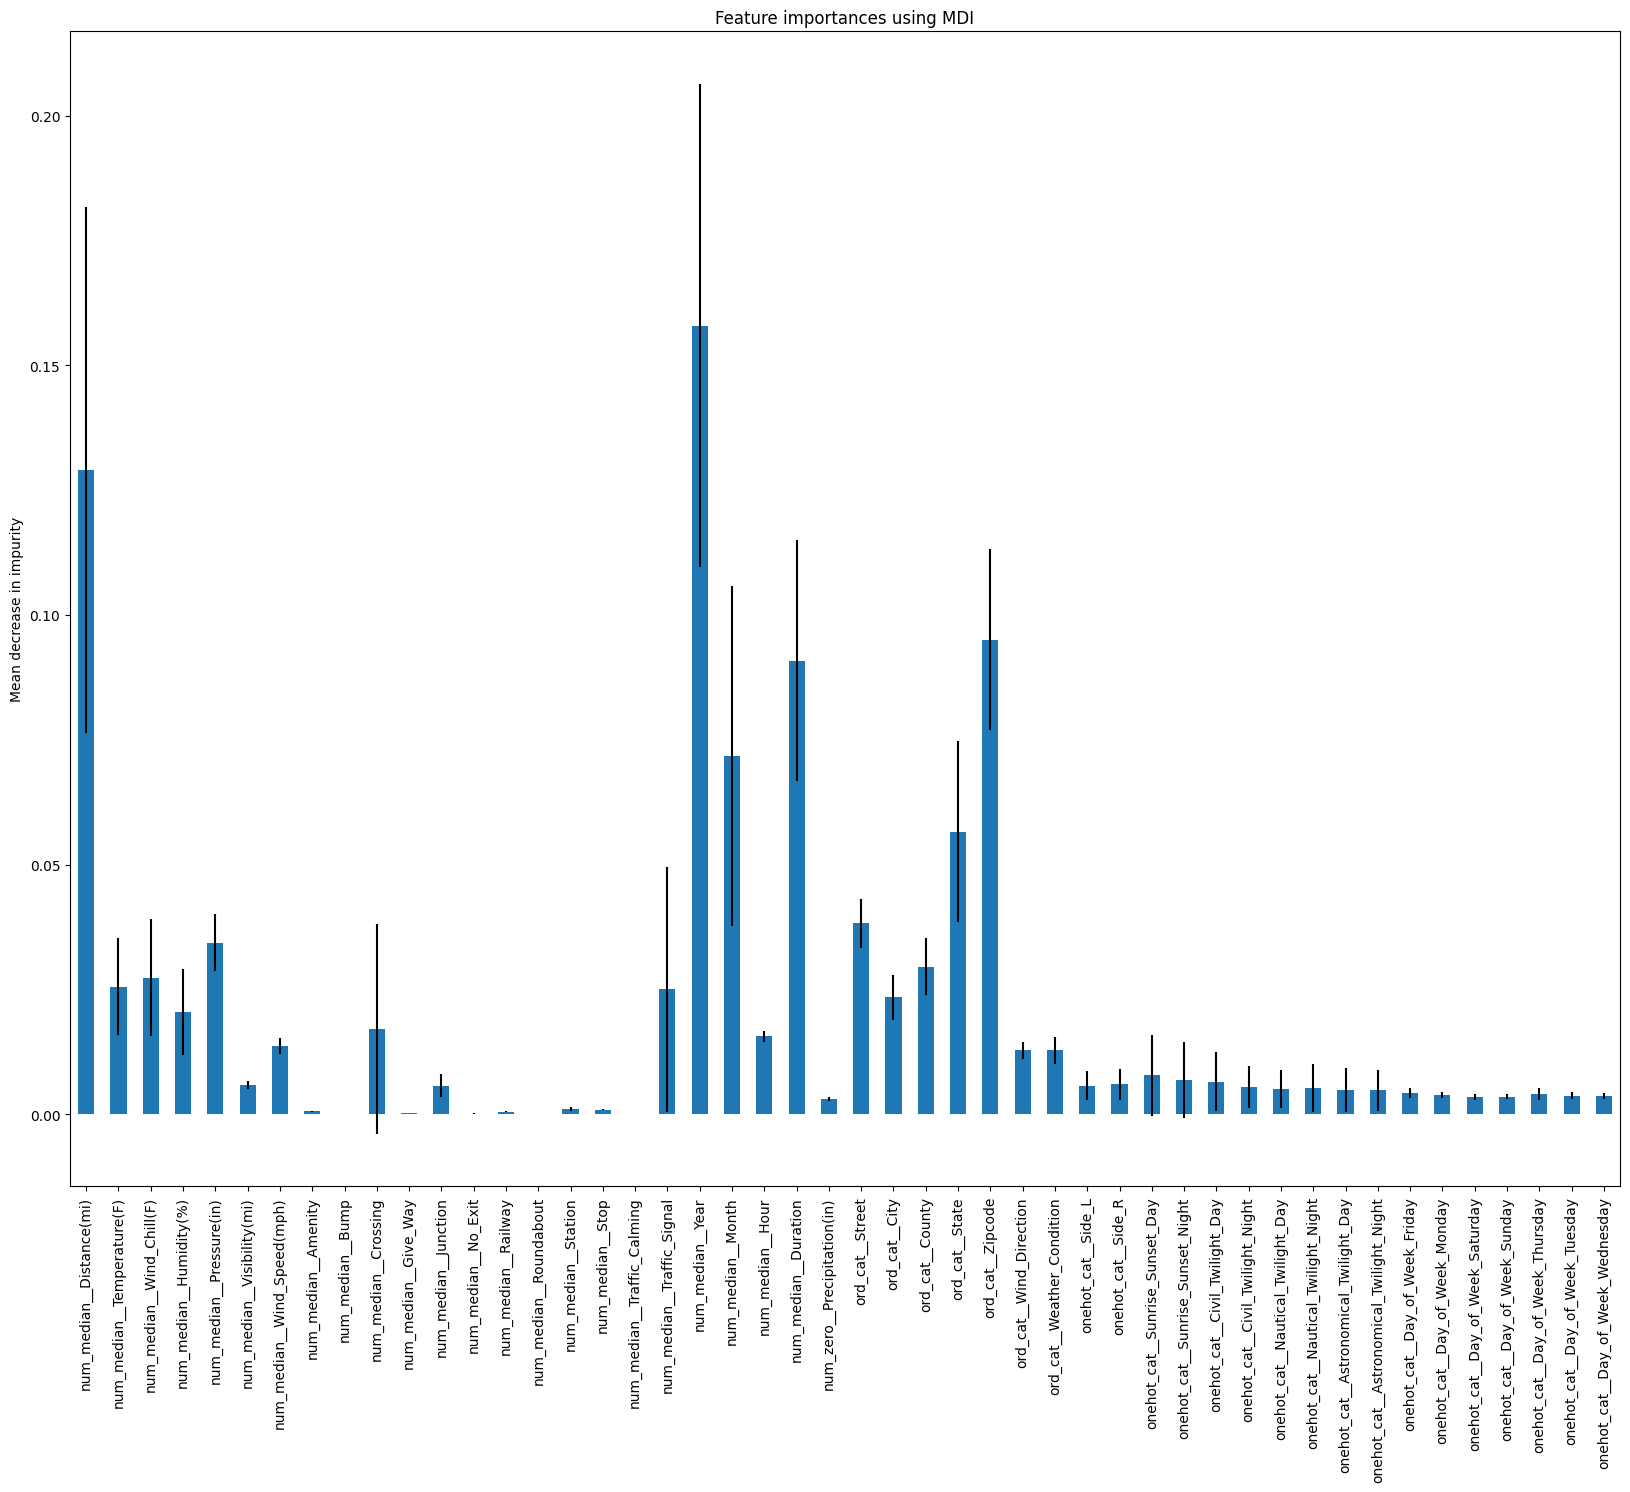

In [73]:
importances = rf_model_res_dropna_balanced.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model_res_dropna_balanced.estimators_], axis=0)

rf_importances = pd.Series(importances, index=preprocessor.get_feature_names_out())

# fig, ax = plt.subplots()
plt.figure(figsize=(20,15))
rf_importances.plot.bar(yerr=std, ax=plt.gca())
plt.gca().set_title("Feature importances using MDI")
plt.gca().set_ylabel("Mean decrease in impurity")
# fig.tight_layout()

In [74]:
importatnt_features = rf_importances.sort_values(ascending=False)[:20].index
print(importatnt_features)

Index(['num_median__Year', 'num_median__Distance(mi)', 'ord_cat__Zipcode',
       'num_median__Duration', 'num_median__Month', 'ord_cat__State',
       'ord_cat__Street', 'num_median__Pressure(in)', 'ord_cat__County',
       'num_median__Wind_Chill(F)', 'num_median__Temperature(F)',
       'num_median__Traffic_Signal', 'ord_cat__City',
       'num_median__Humidity(%)', 'num_median__Crossing', 'num_median__Hour',
       'num_median__Wind_Speed(mph)', 'ord_cat__Weather_Condition',
       'ord_cat__Wind_Direction', 'onehot_cat__Sunrise_Sunset_Day'],
      dtype='object')
num_median__Distance(mi)                   14
num_median__Temperature(F)                  8
num_median__Wind_Chill(F)                  17
num_median__Humidity(%)                    12
num_median__Pressure(in)                   10
num_median__Visibility(mi)                 13
num_median__Wind_Speed(mph)                 7
num_median__Amenity                        16
num_median__Bump                           15
num_median_

In [64]:
from sklearn.ensemble import AdaBoostClassifier

ab_model_res = AdaBoostClassifier(random_state=0)

scoring = ('accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted')

ab_scores_res = cross_validate(ab_model_res, X_train_res, y_train_res, cv=5, scoring=scoring, n_jobs=-1)

In [68]:
ab_scores_res_df = pd.DataFrame(ab_scores_res)
ab_scores_res_df.mean()

fit_time                   182.798534
score_time                   4.514360
test_accuracy                0.687694
test_precision_weighted      0.713076
test_recall_weighted         0.687694
test_f1_weighted             0.690329
dtype: float64

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=0, n_jobs=-1)


NameError: name 'XGBRegressor' is not defined